In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [6]:
kaggle_dataset = pd.read_csv('data/taxi_trip_data.csv', nrows = 15_000_000)

In [4]:
kaggle_dataset.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1,18.15,3,N,1,70.0,0.0,0.0,16.16,10.50,0.3,96.96,161,1
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1,4.59,1,N,1,25.0,0.0,0.5,5.16,0.00,0.3,30.96,13,230
2,2,2018-03-29 13:26:57,2018-03-29 13:28:03,1,0.30,1,N,1,3.0,0.0,0.5,0.76,0.00,0.3,4.56,231,231
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,1,49.5,0.0,0.5,5.61,5.76,0.3,61.67,231,138
4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5,14.45,1,N,1,45.5,0.0,0.5,10.41,5.76,0.3,62.47,87,138


In [7]:
kaggle_dataset.dtypes

vendor_id                int64
pickup_datetime         object
dropoff_datetime        object
passenger_count          int64
trip_distance          float64
rate_code                int64
store_and_fwd_flag      object
payment_type             int64
fare_amount            float64
extra                  float64
mta_tax                float64
tip_amount             float64
tolls_amount           float64
imp_surcharge          float64
total_amount           float64
pickup_location_id       int64
dropoff_location_id      int64
dtype: object

In [59]:
# read entire dataset (~40gb)
nyc_2016_2022 = pd.read_csv('data/nyc_taxi_data_2016_2022.csv')

KeyboardInterrupt: 

In [2]:
# read random sample of dataset (about 5%)
nyc_2016_2022 = pd.read_csv('data/nyc_taxi_data_2016_2022.csv', index_col = 0, header = 0, skiprows = lambda i: i > 0 and random.random() > 0.05)

In [3]:
# read first few tows
nyc_2016_2022.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
Unnamed: 0,,,,,,,,,,,,,,,,,,,
31,2,2022-10-01 00:07:50,2022-10-01 00:41:31,1.0,5.57,1.0,N,234,7,1,24.5,0.5,0.5,0.0,0.0,0.3,28.3,2.5,0.0
84,2,2022-10-01 00:12:08,2022-10-01 00:22:04,3.0,1.29,1.0,N,144,234,1,8.0,0.5,0.5,2.36,0.0,0.3,14.16,2.5,0.0
111,2,2022-10-01 00:29:57,2022-10-01 00:34:37,1.0,0.31,1.0,N,264,79,4,4.5,0.5,0.5,0.0,0.0,0.3,8.3,2.5,0.0
142,2,2022-10-01 00:28:58,2022-10-01 00:41:32,2.0,2.02,1.0,N,148,170,1,10.0,0.5,0.5,2.0,0.0,0.3,15.8,2.5,0.0
147,2,2022-10-01 00:07:41,2022-10-01 00:14:36,1.0,1.22,1.0,N,249,125,1,6.5,0.5,0.5,2.06,0.0,0.3,12.36,2.5,0.0


In [4]:
# check datatypes
nyc_2016_2022.dtypes

VendorID                 object
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          object
trip_distance            object
RatecodeID               object
store_and_fwd_flag       object
PULocationID             object
DOLocationID             object
payment_type             object
fare_amount              object
extra                    object
mta_tax                  object
tip_amount               object
tolls_amount             object
improvement_surcharge    object
total_amount             object
congestion_surcharge     object
airport_fee              object
dtype: object

In [5]:
# find null columns
nyc_2016_2022.isnull().sum().sort_index()/len(nyc_2016_2022)

DOLocationID             0.000000
PULocationID             0.000000
RatecodeID               0.009899
VendorID                 0.000000
airport_fee              0.851940
congestion_surcharge     0.588409
extra                    0.000000
fare_amount              0.000000
improvement_surcharge    0.000000
mta_tax                  0.000000
passenger_count          0.009899
payment_type             0.000000
store_and_fwd_flag       0.009899
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
tpep_dropoff_datetime    0.000000
tpep_pickup_datetime     0.000000
trip_distance            0.000000
dtype: float64

In [9]:
# remove null values, fill missed values with 0
nyc_2016_2022.dropna(subset=['RatecodeID', 'airport_fee', 'congestion_surcharge', 'passenger_count', 'store_and_fwd_flag'], inplace = True)
nyc_2016_2022.fillna(0)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
Unnamed: 0,,,,,,,,,,,,,,,,,,,
31,2,2022-10-01 00:07:50,2022-10-01 00:41:31,1.0,5.57,1.0,N,234.0,7.0,1.0,24.5,0.5,0.5,0.00,0.0,0.3,28.30,2.5,0.00
84,2,2022-10-01 00:12:08,2022-10-01 00:22:04,3.0,1.29,1.0,N,144.0,234.0,1.0,8.0,0.5,0.5,2.36,0.0,0.3,14.16,2.5,0.00
111,2,2022-10-01 00:29:57,2022-10-01 00:34:37,1.0,0.31,1.0,N,264.0,79.0,4.0,4.5,0.5,0.5,0.00,0.0,0.3,8.30,2.5,0.00
142,2,2022-10-01 00:28:58,2022-10-01 00:41:32,2.0,2.02,1.0,N,148.0,170.0,1.0,10.0,0.5,0.5,2.00,0.0,0.3,15.80,2.5,0.00
147,2,2022-10-01 00:07:41,2022-10-01 00:14:36,1.0,1.22,1.0,N,249.0,125.0,1.0,6.5,0.5,0.5,2.06,0.0,0.3,12.36,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820800,2,2021-09-30 23:53:49,2021-09-30 23:57:17,3.0,1.08,1.0,N,68.0,68.0,1.0,5.0,0.5,0.5,2.00,0.0,0.3,10.80,2.5,0.00
2820817,2,2021-09-30 23:58:45,2021-10-01 00:01:57,1.0,1.29,1.0,N,68.0,48.0,1.0,5.5,0.5,0.5,1.86,0.0,0.3,11.16,2.5,0.00
2820848,2,2021-09-30 23:30:23,2021-09-30 23:52:10,1.0,9.36,1.0,N,230.0,243.0,1.0,27.5,0.5,0.5,6.26,0.0,0.3,37.56,2.5,0.00


In [10]:
# convert columns to correct datatypes
convert_columns_float = {
                    'trip_distance': float, 
                    'fare_amount': float, 
                    'extra': float, 
                    'mta_tax': float,
                    'tip_amount': float,
                    'tolls_amount': float,
                    'improvement_surcharge': float,
                    'total_amount': float,
                    'congestion_surcharge': float,
                    'airport_fee': float
                    }
convert_columns_int = {
                    'passenger_count': int,
                    'RatecodeID': int, 
                    'payment_type': int, 
                    'PULocationID': int,
                    'DOLocationID': int
                     }

for column in convert_columns_float.keys():
    nyc_2016_2022[column] = pd.to_numeric(nyc_2016_2022[column], errors='coerce')
for column in convert_columns_int.keys():
    nyc_2016_2022[column] = pd.to_numeric(nyc_2016_2022[column], downcast= 'signed', errors='coerce')
# nyc_2016_2022.astype(convert_columns_float)
# nyc_2016_2022.astype(convert_columns_int)

In [11]:
# parse dates
nyc_2016_2022['tpep_pickup_datetime'] = pd.to_datetime(nyc_2016_2022['tpep_pickup_datetime'])
nyc_2016_2022['tpep_dropoff_datetime'] = pd.to_datetime(nyc_2016_2022['tpep_dropoff_datetime'])

In [12]:
nyc_2016_2022.dtypes

VendorID                         object
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                    int8
trip_distance                   float64
RatecodeID                         int8
store_and_fwd_flag               object
PULocationID                      int16
DOLocationID                      int16
payment_type                       int8
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [13]:
nyc_2016_2022.describe()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.013317e+06,3.013317e+06,3.013317e+06,3.013317e+06,3.013317e+06,3.013317e+06,3.013317e+06,3.013317e+06,3.013317e+06,3.013317e+06,3.013317e+06,3.013317e+06,3.013317e+06,3.013317e+06,3.013317e+06
mean,1.412915e+00,3.331246e+00,1.287616e+00,1.649956e+02,1.629276e+02,1.236602e+00,1.402051e+01,1.038917e+00,4.901161e-01,2.573568e+00,4.684144e-01,2.964574e-01,2.056525e+01,2.287743e+00,8.645000e-02
std,9.926313e-01,6.165408e+00,4.632571e+00,6.518357e+01,7.024214e+01,4.703234e-01,2.285956e+02,1.248969e+00,8.760923e-02,3.193319e+00,1.964617e+00,4.554809e-02,2.288103e+02,7.368481e-01,3.197157e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-7.500000e+02,-4.500000e+00,-5.000000e-01,-4.100000e+02,-5.000000e+01,-3.000000e-01,-7.503000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.100000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.180000e+01,2.500000e+00,0.000000e+00
50%,1.000000e+00,1.830000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.000000e+01,5.000000e-01,5.000000e-01,2.060000e+00,0.000000e+00,3.000000e-01,1.536000e+01,2.500000e+00,0.000000e+00
75%,1.000000e+00,3.350000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.550000e+01,2.500000e+00,5.000000e-01,3.200000e+00,0.000000e+00,3.000000e-01,2.180000e+01,2.500000e+00,0.000000e+00
max,8.000000e+00,7.454080e+03,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.958449e+05,9.050000e+00,3.300000e+00,9.999900e+02,9.565500e+02,1.000000e+00,3.958482e+05,2.750000e+00,1.250000e+00


In [14]:
# remove data that does not make sense: 
# negative extra, mta_tax, tip_amount, tolls_amount, etc
# fare amount starts at $3.00 for yellow cab
nyc_2016_2022 = nyc_2016_2022.drop(nyc_2016_2022[nyc_2016_2022['fare_amount'] < 3].index, axis = 0)
# getting rid of fare amounts costing hundreds / thousands of dollars
nyc_2016_2022 = nyc_2016_2022.drop(nyc_2016_2022[nyc_2016_2022['fare_amount'] > 300].index, axis = 0)
nyc_2016_2022 = nyc_2016_2022.drop(nyc_2016_2022[nyc_2016_2022['extra'] < 0].index, axis = 0)
# mta tax starts at $0.50
nyc_2016_2022 = nyc_2016_2022.drop(nyc_2016_2022[nyc_2016_2022['mta_tax'] < 0.5].index, axis = 0)
nyc_2016_2022 = nyc_2016_2022.drop(nyc_2016_2022[nyc_2016_2022['tip_amount'] < 0].index, axis = 0)
nyc_2016_2022 = nyc_2016_2022.drop(nyc_2016_2022[nyc_2016_2022['tolls_amount'] < 0].index, axis = 0)
# improvement surcharge starts at $0.30
nyc_2016_2022 = nyc_2016_2022.drop(nyc_2016_2022[nyc_2016_2022['improvement_surcharge'] < 0.3].index, axis = 0)
nyc_2016_2022 = nyc_2016_2022.drop(nyc_2016_2022[nyc_2016_2022['total_amount'] < 0].index, axis = 0)
nyc_2016_2022 = nyc_2016_2022.drop(nyc_2016_2022[nyc_2016_2022['congestion_surcharge'] < 0].index, axis = 0)
nyc_2016_2022 = nyc_2016_2022.drop(nyc_2016_2022[nyc_2016_2022['airport_fee'] < 0].index, axis = 0)
# remove passenger count over 6 (maximum possible 6 by New York Law)
nyc_2016_2022 = nyc_2016_2022.drop(nyc_2016_2022[nyc_2016_2022['passenger_count'] > 6].index, axis = 0)
# removing huge trip distances, NYC is about 300 sq feet
nyc_2016_2022 = nyc_2016_2022.drop(nyc_2016_2022[nyc_2016_2022['trip_distance'] > 300].index, axis = 0)

In [15]:
# extracting possible useful features
nyc_2016_2022['fare_per_mile'] = nyc_2016_2022['fare_amount'] / nyc_2016_2022['trip_distance']
nyc_2016_2022['year'] = nyc_2016_2022.tpep_pickup_datetime.dt.year
nyc_2016_2022['month'] = nyc_2016_2022.tpep_pickup_datetime.dt.month
nyc_2016_2022['day_of_week'] = nyc_2016_2022.tpep_pickup_datetime.dt.weekday
nyc_2016_2022['day_of_month'] = nyc_2016_2022.tpep_pickup_datetime.dt.day
nyc_2016_2022['hour'] = nyc_2016_2022.tpep_pickup_datetime.dt.hour
nyc_2016_2022['minute'] = nyc_2016_2022.tpep_pickup_datetime.dt.minute
nyc_2016_2022['second'] = nyc_2016_2022.tpep_pickup_datetime.dt.second

In [16]:
nyc_2016_2022.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,airport_fee,fare_per_mile,year,month,day_of_week,day_of_month,hour,minute,second
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
31,2,2022-10-01 00:07:50,2022-10-01 00:41:31,1,5.57,1,N,234,7,1,...,2.5,0.0,4.398564,2022,10,5,1,0,7,50
84,2,2022-10-01 00:12:08,2022-10-01 00:22:04,3,1.29,1,N,144,234,1,...,2.5,0.0,6.201550,2022,10,5,1,0,12,8
111,2,2022-10-01 00:29:57,2022-10-01 00:34:37,1,0.31,1,N,264,79,4,...,2.5,0.0,14.516129,2022,10,5,1,0,29,57
142,2,2022-10-01 00:28:58,2022-10-01 00:41:32,2,2.02,1,N,148,170,1,...,2.5,0.0,4.950495,2022,10,5,1,0,28,58
147,2,2022-10-01 00:07:41,2022-10-01 00:14:36,1,1.22,1,N,249,125,1,...,2.5,0.0,5.327869,2022,10,5,1,0,7,41


<AxesSubplot:ylabel='Frequency'>

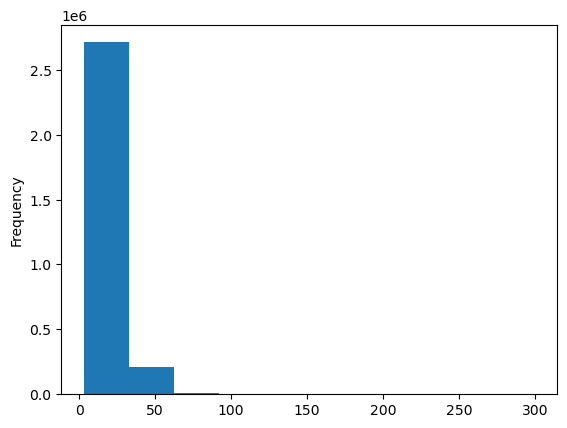

In [17]:
nyc_2016_2022['fare_amount'].plot.hist()

In [23]:
nyc_2016_2022[[nyc_2016_2022['fare_amount'] < 50].index].plot.hist(bins = 20)

SyntaxError: unmatched ']' (469657466.py, line 1)